In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

In [4]:
labels = ['mirai',
                  'unk_bruteforcer',
                  'unk_spammer',
                  'shadowserver',
                  'driftnet',
                  'internetcensus',
                  'censys',
                  'rapid7',
                  'onyphe',
                  'netsystems',
                  'shodan',
                  'unk_exploiter',
                  'securitytrails',
                  'intrinsec',
                  'unknown']

labels.sort()

stacking_strategies = [
    "igcngru_features",
    "idarkvec"]

stacking_strategies.sort()

day = "20211221"
with_nodes = 'vanilla'

In [5]:
importances = []
for fold in np.arange(10):
    rf = load(f"stacking_data/{with_nodes}/{day}/idarkvec-igcngru_features/{fold}/rf.joblib")
    importances.append(rf.feature_importances_)

In [6]:
imp = np.mean(importances, axis=0)

In [7]:
imp.shape

(30,)

In [8]:
xl = []
for s in stacking_strategies:
    for i, c in enumerate(labels):
        xl.append(f"{s} / {c}")

if with_nodes == "nodes":
    for i in np.arange(imp.shape[0] - len(xl)):
        xl.append(f"Node Feature: {i}")

In [9]:
sort = (1-imp).argsort()[:30]
imp_sort = imp[sort]
xl = [ xl[i] for i in sort ]

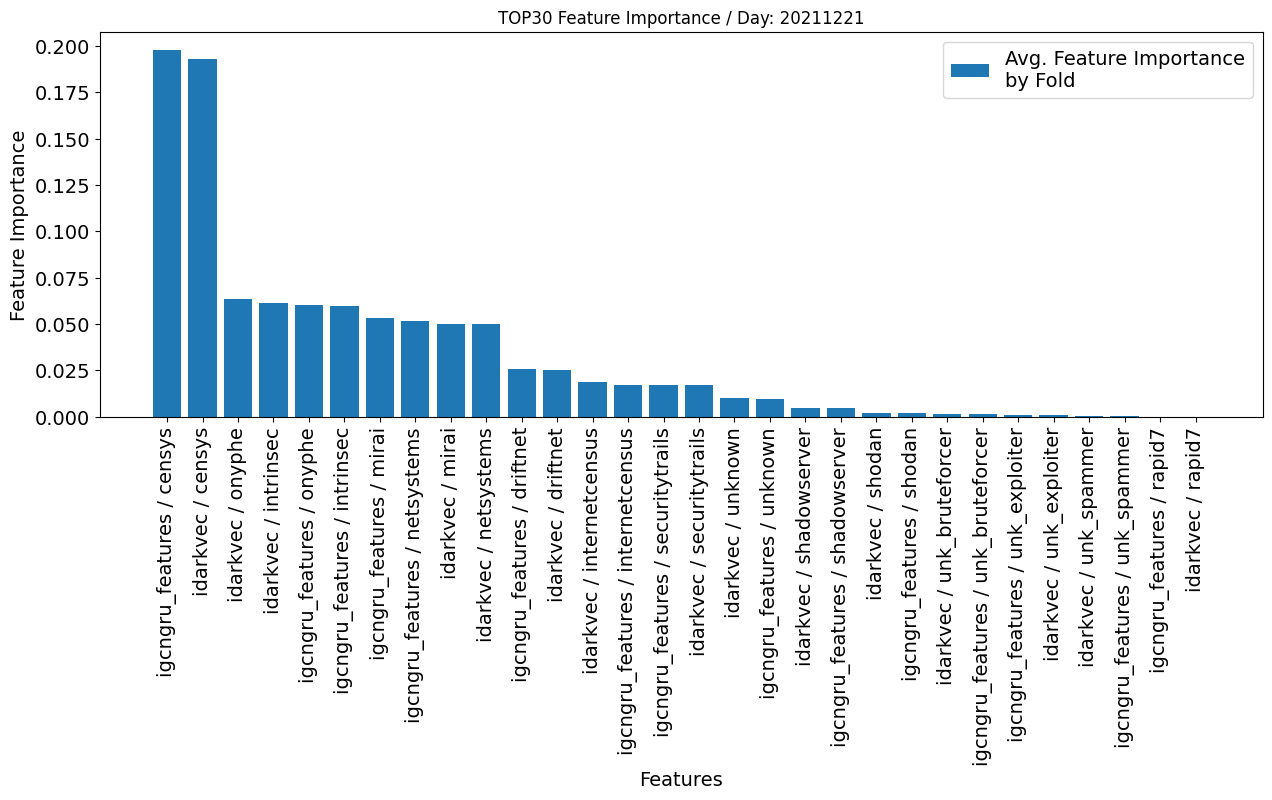

In [10]:
plt.figure(figsize=(15, 5))
x = np.arange(imp_sort.shape[0])
plt.bar(x, imp_sort, label='Avg. Feature Importance\nby Fold')
plt.xticks(ticks=x, labels=xl, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)
plt.title(f"TOP30 Feature Importance / Day: {day}")
plt.legend(fontsize=14)
